In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
warnings.filterwarnings("ignore")
import os
# Any results you write to the current directory are saved as output.

# Let's fill out missing data first

In [39]:
df = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [41]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [42]:
# His Pclass is 3, so let's put average fare of 3rd class.
savg = test['Fare'][test['Pclass']==3].mean()
test['Fare'].fillna(savg, inplace =True)

In [43]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [44]:
#just filled Embarked  'S' since most Embarked is 'S'

df['Embarked'].value_counts(sort=True, ascending=False)
df['Embarked'].fillna('S',inplace =True)

In [45]:
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [46]:
age = df['Age']
avgage = age.sum(axis=0, skipna=True) / len(age)
df['Age'].fillna(avgage, inplace = True)

age1 = test['Age']
testavgage = age1.sum(axis = 0, skipna = True) /len(age1)
test['Age'].fillna(testavgage, inplace = True)

In [47]:
df['Cabin']

0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880            NaN
881            NaN
882         

In [48]:
df = df.drop('Cabin', axis = 1)
test = test.drop('Cabin', axis=1)

In [49]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [50]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [51]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
372,373,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.05,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.50,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.90,S


In [52]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    df1 = pd.DataFrame([survived,dead])
    df1.index= ['Survived','Dead']
    df1.plot(kind='bar',stacked =True, figsize=(10,5))

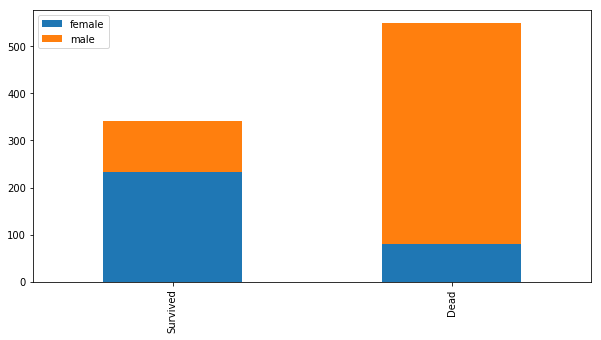

In [53]:
bar_chart('Sex')

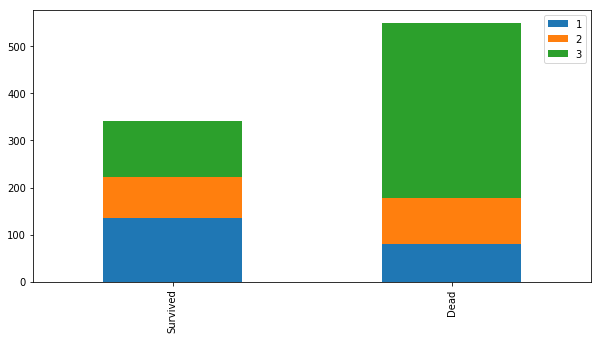

In [54]:
# First class guests Survived more than 2nd or 3rd.
bar_chart('Pclass')

In [55]:
# Data Preprocessing
combined = [df,test]
for i in combined:
    i['Title'] = i['Name'].str.extract(' ([A-Za-z]+)\.', expand =True)
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Capt          1
Ms            1
Lady          1
Sir           1
Mme           1
Don           1
Jonkheer      1
Countess      1
Name: Title, dtype: int64

In [56]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [57]:
# Change each title to number.

title_map = {'Mr' : 0, 'Mrs':1, 'Miss':2, 'Master':3, 'Don':3, 'Rev':3, 'Dr':3, 'Mme':3, 'Ms':3,
       'Major':3, 'Lady':3, 'Sir':3, 'Mlle':3, 'Col':3, 'Capt':3, 'Countess':3,
       'Jonkheer':3,'Dona' :3}
for i in combined:
    i['Title'] = i['Title'].map(title_map)

In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [59]:
# Now we don't need whole name anymore. Remove name column

df.drop('Name',axis = 1, inplace =True)
test.drop('Name',axis = 1, inplace =True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,1,female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0


In [60]:
# Change sex columns. Male equals 1, female equals 2 
sex_map = {'male' : 1, 'female' :2}
for i in combined:
    i['Sex'] = i['Sex'].map(sex_map)

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,2,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,2,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,1,2,35.0,1,0,113803,53.1000,S,1
4,5,0,3,1,35.0,0,0,373450,8.0500,S,0


In [61]:
# Change age range. Let's count 0~13 as child, 14 ~ 20 as young, 
# 21 ~ 30 as adult, 31 ~ 55 as middle-age, 51~ as senior

for i in combined:
    i.loc[i["Age"] <= 13, 'Age'] = 0,
    i.loc[(i["Age"] > 13) & (i["Age"]  <=20),'Age'] =1,
    i.loc[(i["Age"] > 20) & (i["Age"]  <=30),'Age'] =2,
    i.loc[(i["Age"] > 30) & (i["Age"]  <=55),'Age'] =3,
    i.loc[i["Age"] >  55, 'Age'] = 4

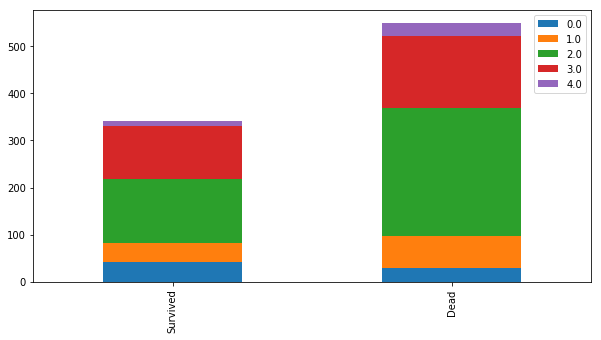

In [62]:
bar_chart('Age')

In [63]:
# Embarked -> number
embarked_map = {'S':0, 'C': 1, 'Q' :2}
for i in combined:
    i['Embarked'] = i['Embarked'].map(embarked_map)

In [64]:
# And we might be able to combine parch and sibsp columns, which makes you see data eaiser.
df['Familysize'] = df['SibSp'] + df['Parch']
test['Familysize'] = test['SibSp'] + test['Parch']

In [65]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Familysize
0,1,0,3,1,2.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,2,3.0,1,0,PC 17599,71.2833,1,1,1
2,3,1,3,2,2.0,0,0,STON/O2. 3101282,7.9250,0,2,0
3,4,1,1,2,3.0,1,0,113803,53.1000,0,1,1
4,5,0,3,1,3.0,0,0,373450,8.0500,0,0,0


In [66]:
# And we don't need Sibsp, Parch columns anymore, so just remove them.
# Plus Ticket, Passengerid columns too...
Drop= ['Ticket','SibSp','Parch']
train = df.drop(Drop, axis=1)
test = test.drop(Drop, axis=1)
train = train.drop(['PassengerId'],axis=1)

In [67]:
import pickle
with open('./data/train.pkl', mode='wb') as f:
    pickle.dump(train, f)
with open('./data/test.pkl', mode='wb') as f:
    pickle.dump(test, f)